In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## provide the path for testing cofing file and tained model form colab
net = cv2.dnn.readNetFromDarknet("yolov4_blink-custom.cfg",r"yolov4_blink-custom_best.weights")

In [4]:
#load trained lstm model
from tensorflow.keras.models import load_model
model=load_model('led_state.h5')
model.summary()

2021-12-27 15:23:40.589902: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-27 15:23:40.589949: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arjun-H310M-H): /proc/driver/nvidia/version does not exist
2021-12-27 15:23:40.590523: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150, 64)           16896     
                                                                 
 lstm_4 (LSTM)               (None, 150, 128)          98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 171,492
Trainable params: 171,492
Non-tr

In [8]:

classes = ['off','yellow_on','red_on','green_on']
test=False
cap=cv2.VideoCapture('LedBlinkVideo.mp4')

led_data_0=[]
led_data_1=[]
led_data_2=[]
led_data_3=[]
led_data_4=[]
led_data_5=[]
led_data_6=[]

predictions_0 = []
predictions_1 = []
predictions_2 = []
predictions_3 = []
predictions_4 = []
predictions_5 = []
predictions_6 = []

threshold=0.5

actions = np.array(['fast_blink', 'off', 'on','slow_blink'])

while True:
    _, img = cap.read()
    
    
    #img = cv2.resize(img,(600,416))
    
    hight,width,_ = img.shape
    
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)
  
    net.setInput(blob)
    
    output_layers_name = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_name)
    

    
        
#     if (test==False):
        

#         layerOutputs = net.forward(output_layers_name)
#         test = True
    
    
    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        
        for detection in output:
            
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            if (label=='off'):
                color=(255,0,0)
                
            elif (label=='red_on'):
                color=(0,0,255)
                
            elif (label=='yellow_on'):
                color=(0,255,240)
                
            else:
                color=(0,255,0)
                
                
            #color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
#             cv2.rectangle(img,(570,150),(715,300),(0,0,255),2)
#             cv2.rectangle(img,(655,150),(805,300),(255,0,0),2)
#             cv2.rectangle(img,(745,150),(900,300),(255,0,255),2)
#             cv2.rectangle(img,(840,150),(995,300),(255,255,255),2)
#             cv2.rectangle(img,(930,150),(1085,300),(0,0,0),2)
#             cv2.rectangle(img,(1030,150),(1180,300),(100,0,255),2)
#             cv2.rectangle(img,(1120,150),(1300,300),(255,100,255),2)
            cv2.putText(img,label, (x,y-5),font,1,color,2)   
            if ((label=='red_on') or (label=='yellow_on') or (label=='green_on')):
                label=1
            else:
                label=0 
                
            if (570<=x<=715)  and (570<=(x+w)<=715):  
                if (len(led_data_0)>=150):
                    led_array_0=np.array(led_data_0)
                    led_array_0.resize(1,150,1) 
                    res_0 = model.predict(led_array_0)[0]
                    
                    predictions_0.append(np.argmax(res_0))
                    blink_label=actions[np.argmax(res_0)]
                    cv2.putText(img,blink_label  , (x,y-40),font,1,(0,0,255),2)
                    led_data_0.pop(0)  
                    led_data_0.append(label)
                else:
                    led_data_0.append(label) 
                    
            elif (655<=x<=805)  and (655<=(x+w)<=805):  
                if (len(led_data_1)>=150):
                    led_array_1=np.array(led_data_1)
                    led_array_1.resize(1,150,1) 
                    res_1 = model.predict(led_array_1)[0]
                    
                    predictions_1.append(np.argmax(res_1))
                    blink_label=actions[np.argmax(res_1)]
                    cv2.putText(img,blink_label , (x,y-40),font,1,(255,0,0),2)
                    led_data_1.pop(0)  
                    led_data_1.append(label)
                else:
                    led_data_1.append(label)
                  
        
            elif (745<=x<=900)  and (745<=(x+w)<=900):  
                if (len(led_data_2)>=150):
                    led_array_2=np.array(led_data_2)
                    led_array_2.resize(1,150,1) 
                    res_2 = model.predict(led_array_2)[0]
                    
                    predictions_2.append(np.argmax(res_2))
                    blink_label=actions[np.argmax(res_2)]
                    cv2.putText(img,blink_label , (x,y-40),font,1,(0,0,0),2)
                    led_data_2.pop(0)  
                    led_data_2.append(label)
                else:
                    led_data_2.append(label)
                
            elif (840<=x<=995)  and (840<=(x+w)<=995):  
                if (len(led_data_3)>=150):
                    led_array_3=np.array(led_data_3)
                    led_array_3.resize(1,150,1) 
                    res_3 = model.predict(led_array_3)[0]
                    
                    predictions_3.append(np.argmax(res_3))
                    blink_label=actions[np.argmax(res_3)]
                    cv2.putText(img,blink_label , (x,y-40),font,1,(0,255,0),2)
                    led_data_3.pop(0)  
                    led_data_3.append(label)
                else:
                    led_data_3.append(label)
                
            elif (930<=x<=1085)  and (930<=(x+w)<=1085):  
                if (len(led_data_4)>=150):
                    led_array_4=np.array(led_data_4)
                    led_array_4.resize(1,150,1) 
                    res_4 = model.predict(led_array_4)[0]
                    
                    predictions_4.append(np.argmax(res_4))
                    blink_label=actions[np.argmax(res_4)]
                    cv2.putText(img,blink_label , (x,y-40),font,1,(0,255,255),2)
                    led_data_4.pop(0)  
                    led_data_4.append(label)
                else:
                    led_data_4.append(label)
                
            elif (1030<=x<=1180)  and (1030<=(x+w)<=1180):  
                if (len(led_data_5)>=150):
                    led_array_5=np.array(led_data_5)
                    led_array_5.resize(1,150,1) 
                    res_5 = model.predict(led_array_5)[0]
                    
                    predictions_5.append(np.argmax(res_5))
                    blink_label=actions[np.argmax(res_5)]
                    cv2.putText(img,blink_label , (x,y-40),font,1,(255,0,255),2)
                    led_data_5.pop(0)  
                    led_data_5.append(label)
                else:
                    led_data_5.append(label)
                
            elif (1120<=x<=1300)  and (1120<=(x+w)<=1300):  
                if (len(led_data_6)>=150):
                    led_array_6=np.array(led_data_6)
                    led_array_6.resize(1,150,1) 
                    res_6 = model.predict(led_array_6)[0]
                    
                    predictions_6.append(np.argmax(res_6))
                    blink_label=actions[np.argmax(res_6)]
                    cv2.putText(img,blink_label , (x,y-40),font,1,(255,255,0),2)
                    led_data_6.pop(0)  
                    led_data_6.append(label)
                else:
                    led_data_6.append(label)  
                
            else:
                print('co-ordinates are not matched')
                
    
    cv2.imshow('img',img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()



QObject::moveToThread: Current thread (0x5619810f8260) is not the object's thread (0x5619811c7bf0).
Cannot move to target thread (0x5619810f8260)

QObject::moveToThread: Current thread (0x5619810f8260) is not the object's thread (0x5619811c7bf0).
Cannot move to target thread (0x5619810f8260)

QObject::moveToThread: Current thread (0x5619810f8260) is not the object's thread (0x5619811c7bf0).
Cannot move to target thread (0x5619810f8260)

QObject::moveToThread: Current thread (0x5619810f8260) is not the object's thread (0x5619811c7bf0).
Cannot move to target thread (0x5619810f8260)

QObject::moveToThread: Current thread (0x5619810f8260) is not the object's thread (0x5619811c7bf0).
Cannot move to target thread (0x5619810f8260)

QObject::moveToThread: Current thread (0x5619810f8260) is not the object's thread (0x5619811c7bf0).
Cannot move to target thread (0x5619810f8260)

QObject::moveToThread: Current thread (0x5619810f8260) is not the object's thread (0x5619811c7bf0).
Cannot move to tar

In [7]:
predictions_0

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

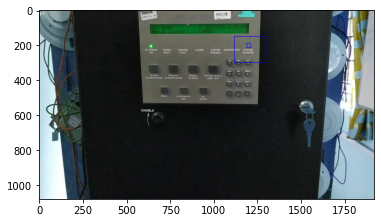

In [11]:
import cv2
import matplotlib.pyplot as plt
cap=cv2.VideoCapture('LedBlinkVideo.mp4')
ret,frame=cap.read()
#system trouble led
#frame=frame[180:250,960:1052]
#alarm red
#frame=frame[190:240,870:970]

frame=cv2.rectangle(frame,(1191,189),(1214,215),(0,0,255),2)
frame=cv2.rectangle(frame,(1120,150),(1300,300),(0,0,255),2)
# frame=cv2.rectangle(frame,(813,193),(837,214),(0,255,0),2)
# frame=cv2.rectangle(frame,(1191,191),(1216,216),(255,0,0),2)
# frame=cv2.rectangle(frame,(814,192),(838,215),(255,0,255),2)
# frame=cv2.rectangle(frame,(1189,189),(1215,216),(0,255,255),2)
# frame=cv2.rectangle(frame,(812,192),(835,213),(255,255,255),2)
# frame=cv2.rectangle(frame,(1001,187),(1029,222),(100,5,0),2)

plt.imshow(frame)
plt.show()
cap.release()

In [11]:
cv2.imshow('image',frame)

QObject::moveToThread: Current thread (0x555dddc69ab0) is not the object's thread (0x555dde08efa0).
Cannot move to target thread (0x555dddc69ab0)

QObject::moveToThread: Current thread (0x555dddc69ab0) is not the object's thread (0x555dde08efa0).
Cannot move to target thread (0x555dddc69ab0)

QObject::moveToThread: Current thread (0x555dddc69ab0) is not the object's thread (0x555dde08efa0).
Cannot move to target thread (0x555dddc69ab0)

QObject::moveToThread: Current thread (0x555dddc69ab0) is not the object's thread (0x555dde08efa0).
Cannot move to target thread (0x555dddc69ab0)

QObject::moveToThread: Current thread (0x555dddc69ab0) is not the object's thread (0x555dde08efa0).
Cannot move to target thread (0x555dddc69ab0)

QObject::moveToThread: Current thread (0x555dddc69ab0) is not the object's thread (0x555dde08efa0).
Cannot move to target thread (0x555dddc69ab0)

QObject::moveToThread: Current thread (0x555dddc69ab0) is not the object's thread (0x555dde08efa0).
Cannot move to tar

In [14]:
cap=cv2.VideoCapture('LedBlinkVideo.mp4')
while True:
    ret,img=cap.read()
    #img = cv2.resize(img,(600,416))
                
    cv2.rectangle(img,(570,150),(715,300),(255,0,255),2)
#     cv2.rectangle(img,(655,150),(805,300),(255,0,255),2)
#     cv2.rectangle(img,(745,150),(900,300),(255,0,255),2)
#     cv2.rectangle(img,(840,150),(995,300),(255,0,255),2)
#     cv2.rectangle(img,(930,150),(1085,300),(255,0,255),2)
#     cv2.rectangle(img,(1030,150),(1180,300),(255,0,255),2)
#     cv2.rectangle(img,(1120,150),(1300,300),(255,0,255),2)
    cv2.imshow('img',img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x5653923e8e10) is not the object's thread (0x565392be6ed0).
Cannot move to target thread (0x5653923e8e10)

QObject::moveToThread: Current thread (0x5653923e8e10) is not the object's thread (0x565392be6ed0).
Cannot move to target thread (0x5653923e8e10)

QObject::moveToThread: Current thread (0x5653923e8e10) is not the object's thread (0x565392be6ed0).
Cannot move to target thread (0x5653923e8e10)

QObject::moveToThread: Current thread (0x5653923e8e10) is not the object's thread (0x565392be6ed0).
Cannot move to target thread (0x5653923e8e10)

QObject::moveToThread: Current thread (0x5653923e8e10) is not the object's thread (0x565392be6ed0).
Cannot move to target thread (0x5653923e8e10)

QObject::moveToThread: Current thread (0x5653923e8e10) is not the object's thread (0x565392be6ed0).
Cannot move to target thread (0x5653923e8e10)

QObject::moveToThread: Current thread (0x5653923e8e10) is not the object's thread (0x565392be6ed0).
Cannot move to tar

error: OpenCV(4.5.4) /tmp/pip-req-build-24v3eisa/opencv/modules/highgui/src/window.cpp:1006: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'
